
Sales Revenue DataFrame:
           Division A  Division B
Act2019         43.9        33.9
Act2020         40.3        30.3
Proj2021        50.2        33.9


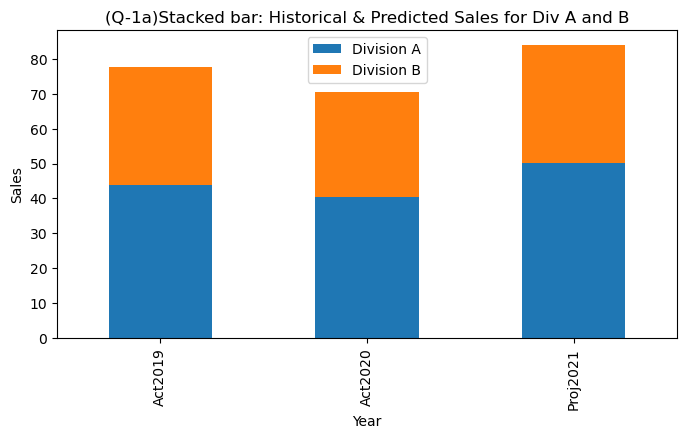

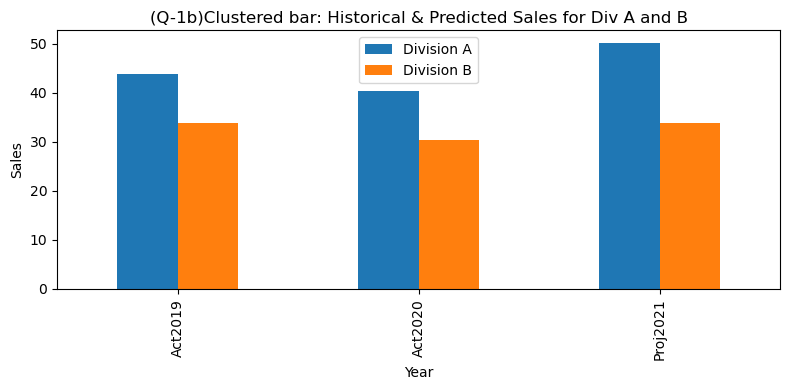

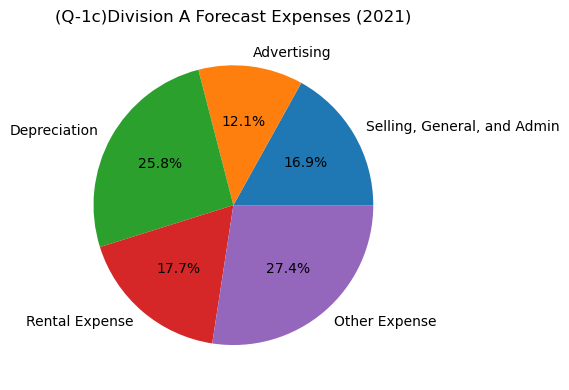

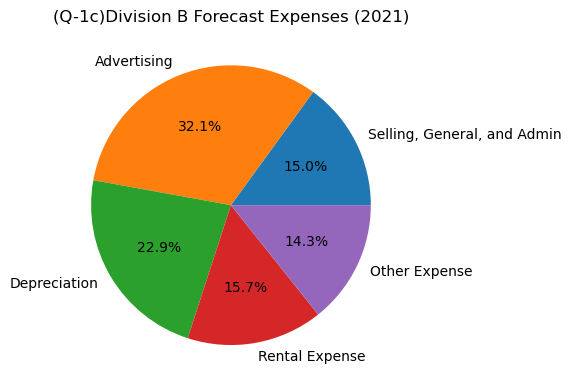

In [8]:
#Q-1
import pandas as pd
import matplotlib.pyplot as plt

#Reading the data for Division A and Division B files.
divA = pd.read_csv('IncStmt-DivA_Tanjeem.csv', skiprows= 5, usecols= ['Description', 'Act2019', 'Act2020', 'Proj2021'])
divB = pd.read_csv('IncStmt-DivB_Tanjeem.csv', skiprows= 5, usecols= ['Description', 'Act2019', 'Act2020', 'Proj2021'])

#Defining numeric columns for the periods
periods= ('Act2019', 'Act2020', 'Proj2021')

#Extracting 'SALE' row for both divisions
sales_df= pd.DataFrame({
    "Division A": divA.loc[divA['Description'] == 'Sales Revenue', periods].squeeze(),
    "Division B": divB.loc[divB['Description'] == 'Sales Revenue', periods].squeeze()
}, index= periods)

print("\nSales Revenue DataFrame:\n", sales_df)

#Q-1a:Creating a stacked bar chart of sales
ax= sales_df.plot(kind= 'bar', stacked= True, figsize= (8,4), 
                  title= '(Q-1a)Stacked bar: Historical & Predicted Sales for Div A and B')
ax.set_xlabel('Year') 
ax.set_ylabel('Sales')
ax.set_xlabel('Year') 
plt.show()

#Q-1b:Creating a clustered bar chart
ax= sales_df.plot(kind= 'bar', stacked= False, figsize= (8,4), 
                  title= '(Q-1b)Clustered bar: Historical & Predicted Sales for Div A and B')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
plt.tight_layout()
plt.show()

#Q-1c:Creating pie charts for forecast expenses for Division A and B
def get_expenses_2021(df, descriptions):
    filtered = df[df['Description'].isin(descriptions)]
    return pd.Series(filtered["Proj2021"].values, index=filtered["Description"].values)

expense_descriptions = ["Selling, General, and Admin", "Advertising", "Depreciation", "Rental Expense", "Other Expense"]

for df, label in [(divA, 'Division A'), (divB, 'Division B')]:
    exp = get_expenses_2021(df, expense_descriptions)
    if not exp.empty:
        plt.figure(figsize=(8,4))
        exp.plot(kind='pie', autopct='%1.1f%%', title=f'(Q-1c){label} Forecast Expenses (2021)')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No forecast expense data found for {label} for 2021.")


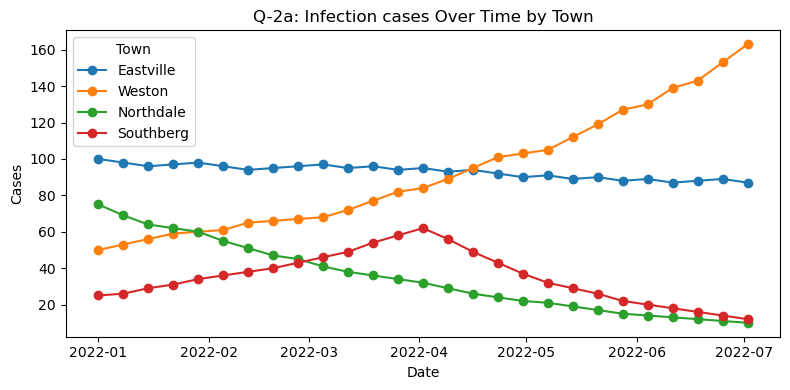

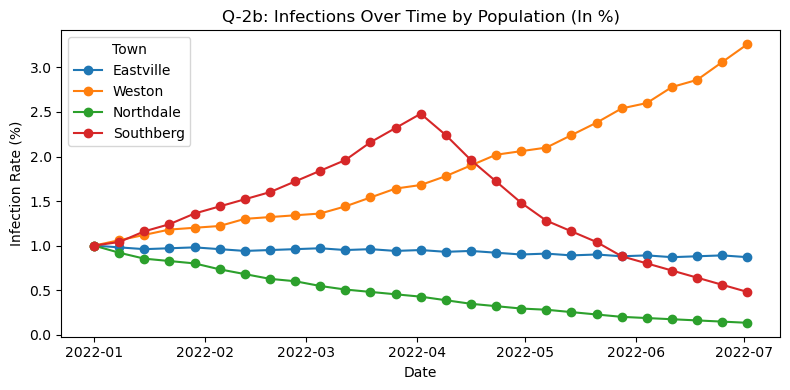

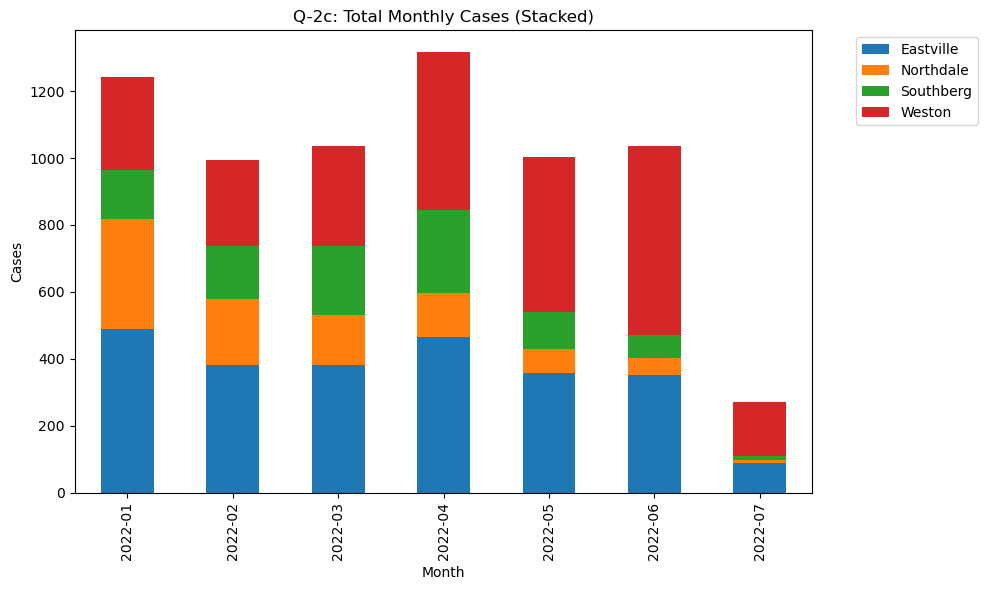

In [9]:
#Q-2
import pandas as pd
import matplotlib.pyplot as plt

#Reading the data for Health and Population
health_df = pd.read_csv('HealthData_Tanjeem.csv')
population_df = pd.read_csv('PopulationData_Tanjeem.csv')

#Converting 'Date' to datetime and merging Population data into Health data
health_df['Date'] = pd.to_datetime(health_df['Date'])
merged_df = pd.merge(health_df, population_df, on='Towncode', how='left')

#Q-2a:Creating a Line Graph for all cities over time
plt.figure(figsize=(8, 4))
for town in merged_df['Townname'].unique():
    data = merged_df[merged_df['Townname'] == town].sort_values('Date')
    plt.plot(data['Date'], data['Cases'], marker='o', label=town)
plt.title('Q-2a: Infection cases Over Time by Town')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(title='Town')
plt.tight_layout()
plt.show()

#Q-2b:Creating a Line Chart for each city’s infections over time as percentage
merged_df['InfectionRate'] = merged_df['Cases'] / merged_df['Population'] * 100
plt.figure(figsize=(8, 4))
for town in merged_df['Townname'].unique():
    data = merged_df[merged_df['Townname'] == town].sort_values('Date')
    plt.plot(data['Date'], data['InfectionRate'], marker='o', label=town)
plt.title('Q-2b: Infections Over Time by Population (In %)')
plt.xlabel('Date')
plt.ylabel('Infection Rate (%)')
plt.legend(title='Town')
plt.tight_layout()
plt.show()

#Q-2c:Creating a Stacked Bar Chart for overall infection count in each month
merged_df['Month'] = merged_df['Date'].dt.to_period('M').astype(str)
pivot_df = merged_df.pivot_table(
    index='Month', 
    columns='Townname', 
    values='Cases', 
    aggfunc='sum', 
    fill_value=0
)
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Q-2c: Total Monthly Cases (Stacked)')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()